In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_NE_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4.0,130.0,322.0,0.0,2.0,109.0,0,2.4,2.0,3.0,3.0
1,0.0,67.0,3.0,115.0,NaN,NaN,NaN,160.0,0,1.6,2.0,0.0,7.0
2,1.0,57.0,2.0,124.0,261.0,0.0,0.0,141.0,0,0.3,1.0,0.0,7.0
3,1.0,NaN,4.0,NaN,263.0,0.0,0.0,105.0,1,0.2,2.0,1.0,7.0
4,0.0,NaN,2.0,120.0,NaN,0.0,2.0,121.0,1,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,172.0,199.0,1.0,0.0,NaN,0,0.5,1.0,0.0,7.0
266,1.0,NaN,2.0,120.0,263.0,0.0,0.0,173.0,0,0.0,1.0,0.0,7.0
267,0.0,56.0,2.0,140.0,294.0,0.0,2.0,153.0,0,1.3,2.0,0.0,3.0
268,1.0,57.0,4.0,140.0,192.0,0.0,0.0,148.0,0,0.4,2.0,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	36
float64		column 2	35
float64		column 3	22
float64		column 4	35
float64		column 5	43
float64		column 6	22
float64		column 7	42
float64		column 8	35
int64		column 9	0
float64		column 10	14
float64		column 11	15
float64		column 12	22
float64		column 13	21


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,234.000000,235.000000,248.000000,235.000000,227.000000,248.000000,228.000000,235.000000,270.000000,256.000000,255.000000,248.000000,249.000000
mean,0.675214,54.629787,3.165323,131.029787,249.616740,0.157258,1.026316,150.289362,0.329630,1.042578,1.588235,0.677419,4.654618
std,0.469299,8.721423,0.944238,18.015757,45.609911,0.364780,0.997446,21.806876,0.470952,1.131034,0.620403,0.935563,1.936801
min,0.000000,29.000000,1.000000,94.000000,141.000000,0.000000,0.000000,88.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,48.000000,3.000000,120.000000,218.500000,0.000000,0.000000,138.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,246.000000,0.000000,2.000000,154.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,275.500000,0.000000,2.000000,165.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,200.000000,417.000000,1.000000,2.000000,194.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

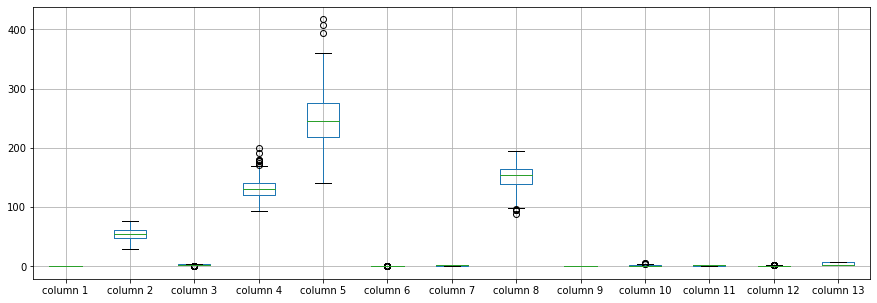

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.675214
column 2      54.629787
column 3       3.165323
column 4     131.029787
column 5     249.616740
column 6       0.157258
column 7       1.026316
column 8     150.289362
column 9       0.329630
column 10      1.042578
column 11      1.588235
column 12      0.677419
column 13      4.654618
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.058760,0.083956,-0.064909,-0.160564,0.084700,0.017866,-0.127973,0.177294,0.095858,0.069301,0.068281,0.422822
column 2,-0.058760,1.000000,0.028223,0.286037,0.194280,0.112142,0.126634,-0.376949,0.082025,0.197313,0.088914,0.312752,0.110466
column 3,0.083956,0.028223,1.000000,-0.068179,0.106161,-0.068894,0.090702,-0.244343,0.327466,0.078222,0.113964,0.220715,0.286599
column 4,-0.064909,0.286037,-0.068179,1.000000,0.278281,0.200525,0.130604,-0.097823,0.123193,0.235878,0.184307,0.106048,0.154849
column 5,-0.160564,0.194280,0.106161,0.278281,1.000000,0.069395,0.158092,-0.052942,0.100944,-0.035458,-0.070987,0.200672,0.006344
column 6,0.084700,0.112142,-0.068894,0.200525,0.069395,1.000000,0.078138,0.020246,0.009936,-0.027407,0.071515,0.151494,0.016169
column 7,0.017866,0.126634,0.090702,0.130604,0.158092,0.078138,1.000000,-0.071446,0.074300,0.100431,0.148863,0.094926,0.001919
column 8,-0.127973,-0.376949,-0.244343,-0.097823,-0.052942,0.020246,-0.071446,1.000000,-0.396218,-0.349883,-0.330798,-0.316365,-0.269533
column 9,0.177294,0.082025,0.327466,0.123193,0.100944,0.009936,0.074300,-0.396218,1.000000,0.250754,0.258537,0.165137,0.322701
column 10,0.095858,0.197313,0.078222,0.235878,-0.035458,-0.027407,0.100431,-0.349883,0.250754,1.000000,0.610365,0.263801,0.290876


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+66,13+66+66,13+66+66+66,13+66+66+66+66,13+66+66+66+66+66,13+66+66+66+66,13+66+66+66,13+66+66,13+66,13], vae_layer = False, seed = 66)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 521.603364944458
Epoch: 1 , loss: 519.8199863433838
Epoch: 2 , loss: 521.5112400054932
Epoch: 3 , loss: 521.327657699585
Epoch: 4 , loss: 523.9771728515625
Epoch: 5 , loss: 525.2279033660889
Epoch: 6 , loss: 523.1329402923584
Epoch: 7 , loss: 521.7188568115234
Epoch: 8 , loss: 523.8938751220703
Epoch: 9 , loss: 521.9356670379639
Epoch: 10 , loss: 523.3741512298584
Epoch: 11 , loss: 522.6033878326416
Epoch: 12 , loss: 523.658634185791
Epoch: 13 , loss: 523.3851871490479
Epoch: 14 , loss: 517.5040493011475
Epoch: 15 , loss: 516.4919204711914
Epoch: 16 , loss: 511.5346927642822
Epoch: 17 , loss: 508.9391975402832
Epoch: 18 , loss: 504.01048851013184
Epoch: 19 , loss: 495.6885223388672
Epoch: 20 , loss: 469.2661590576172
Epoch: 21 , loss: 429.8809814453125
Epoch: 22 , loss: 411.79249000549316
Epoch: 23 , loss: 385.39255714416504
Epoch: 24 , loss: 379.8399963378906
Epoch: 25 , loss: 368.37571144104004
Epoch

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.000000
column 2      66.095596
column 3       2.000000
column 4     130.000000
column 5     245.000000
column 6       0.000000
column 7       2.000000
column 8     180.000000
column 9       0.000000
column 10      0.200000
column 11      2.000000
column 12      0.000000
column 13      3.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.000000,-345.56218,0.291199,-1.437776,0.000000,0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0
3,0.0,7.088707,0.000000,20.583862,0.00000,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0
4,0.0,-29.372322,0.000000,0.000000,-129.85675,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-91.062782,0,0.0,0.0,0.0,0.0
266,0.0,10.556767,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0
267,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0
268,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1347.418929174382, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.24884220580217037

In [18]:
new_df.iloc[66,:]

column 1       1.000000
column 2      51.000000
column 3       4.000000
column 4     140.000000
column 5     261.000000
column 6       0.071064
column 7       2.000000
column 8     186.000000
column 9       1.000000
column 10      0.000000
column 11      0.725253
column 12      0.000000
column 13      3.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.000000,4.000000,130.000000,322.00000,0.000000,2.000000,109.000000,0,2.4,2.0,3.0,3.0
1,0.0,67.000000,3.000000,115.000000,218.43782,0.291199,0.562224,160.000000,0,1.6,2.0,0.0,7.0
2,1.0,57.000000,2.000000,124.000000,261.00000,0.000000,0.000000,141.000000,0,0.3,1.0,0.0,7.0
3,1.0,71.088707,4.000000,148.583862,263.00000,0.000000,0.000000,105.000000,1,0.2,2.0,1.0,7.0
4,0.0,44.627678,2.000000,120.000000,139.14325,0.000000,2.000000,121.000000,1,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.000000,3.000000,172.000000,199.00000,1.000000,0.000000,70.937218,0,0.5,1.0,0.0,7.0
266,1.0,54.556767,2.000000,120.000000,263.00000,0.000000,0.000000,173.000000,0,0.0,1.0,0.0,7.0
267,0.0,56.000000,2.000000,140.000000,294.00000,0.000000,2.000000,153.000000,0,1.3,2.0,0.0,3.0
268,1.0,57.000000,4.000000,140.000000,192.00000,0.000000,0.000000,148.000000,0,0.4,2.0,0.0,6.0


In [20]:
imputations[-1].to_excel("Sheart_NE_10(imp).xlsx", index=False, header=False)